In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import ks_2samp
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [4]:
ball_df = pd.read_csv('Data/ballbyball.csv')
country_df = pd.read_csv('Data/country.csv')
ground_df = pd.read_csv('Data/ground.csv')
matches_df = pd.read_csv('Data/matches.csv')
players_df = pd.read_csv('Data/players.csv')
season_df = pd.read_csv('Data/season.csv')
team_df = pd.read_csv('Data/team.csv')
town_df = pd.read_csv('Data/town.csv')

In [5]:
ball_df.head()

,index,match_id,inningNumber,overNumber,ballNumber,oversUnique,oversActual,batsmanPlayerId,bowlerPlayerId,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,penalties,run,batsmanRuns,totalRuns,totalWickets,outPlayerId,shotType
0,0,100706,1,1,1,0.01,0.1,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,DEFENDED
1,1,100706,1,1,2,0.02,0.2,52584,87127,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,CUT_SHOT
2,2,100706,1,1,3,0.03,0.3,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,DEFENDED
3,3,100706,1,1,4,0.04,0.4,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,FLICK
4,4,100706,1,1,5,0.05,0.5,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,0,1,52584.0,COVER_DRIVE


In [6]:
ball_df['totalRuns'] = ball_df['totalRuns'] - ball_df['run']
ball_df['totalWickets'] = ball_df['totalWickets'] - ball_df['isWicket'].apply(lambda x: 1 if x else 0)

In [7]:
country_df.head()

,Country ID,Country Name,Country Abbreviation
0,1,England,ENG
1,4,West Indies,WI
2,8,Sri Lanka,SL
3,25,Bangladesh,BAN
4,6,India,IND


In [8]:
ground_df.head()

,Ground ID,Ground Name,Ground Slug,Town ID,Capacity
0,10,"Lord's, London",lord-s-london,224,30000
1,45,"Kennington Oval, London",kennington-oval-london,224,23500
2,34,"Trent Bridge, Nottingham",trent-bridge-nottingham,254,"15,350 (to be 17,000)"
3,1986,"Providence Stadium, Guyana",providence-stadium-guyana,1076,"15,000"
4,1697,"Beausejour Stadium, Gros Islet, St Lucia",daren-sammy-national-cricket-stadium-gros-isle...,1019,"12,400"


In [9]:
matches_df.head()

,season_id,match_id,slug,title,time_of_day,date,time,status,status_description,winner_team_id,toss_winner_team_id,toss_choice,ground_id,team_1_id,team_2_id,team_1_score,team_1_scoreInfo,team_2_scoreInfo
0,4162,18581,england-vs-netherlands-1st-match-group-b,"1st Match, Group B",daynight,2009-06-05,22:00:00,RESULT,Netherlands won by 4 wickets (with 0 balls rem...,15.0,15.0,2.0,10,1,15,163/6,NaN,"20 ov, T:163"
1,4162,18582,new-zealand-vs-scotland-2nd-match-group-d,"2nd Match, Group D",day,2009-06-06,14:30:00,RESULT,New Zealand won by 7 wickets (with 6 balls rem...,5.0,5.0,2.0,45,30,5,90/3,7/7 ov,"6/7 ov, T:90"
2,4162,18583,australia-vs-west-indies-3rd-match-group-c,"3rd Match, Group C",day,2009-06-06,18:30:00,RESULT,West Indies won by 7 wickets (with 25 balls re...,4.0,2.0,1.0,45,2,4,172/3,NaN,"15.5/20 ov, T:170"
3,4162,18584,bangladesh-vs-india-4th-match-group-a,"4th Match, Group A",night,2009-06-06,22:30:00,RESULT,India won by 25 runs,6.0,6.0,1.0,34,6,25,155/8,NaN,"20 ov, T:181"
4,4162,18585,scotland-vs-south-africa-5th-match-group-d,"5th Match, Group D",day,2009-06-07,18:00:00,RESULT,South Africa won by 130 runs,3.0,30.0,2.0,45,3,30,81,NaN,"15.4/20 ov, T:212"


In [10]:
players_df.head()

,ID,Name,Role,Full Name,Image,DOB,Batting Style (s),Bowling Style (s),Batting Style (l),Bowling Style(l),Team ID,Playing Role
0,2230,RT Ponting,C,Ricky Ponting,/db/PICTURES/CMS/202600/202613.1.jpg,19-12-1974,rhb,rm,right-hand bat,right-arm medium,2.0,top-order batter
1,8876,MJ Clarke,VC,Michael Clarke,/db/PICTURES/CMS/202500/202579.1.jpg,2-4-1981,rhb,sla,right-hand bat,slow left-arm orthodox,2.0,middle-order batter
2,7445,NW Bracken,P,Nathan Bracken,/db/PICTURES/CMS/103900/103970.1.jpg,12-9-1977,rhb,lfm,right-hand bat,left-arm fast-medium,2.0,bowler
3,6426,BJ Haddin,WK,Brad Haddin,/db/PICTURES/CMS/202500/202587.1.jpg,23-10-1977,rhb,NaN,right-hand bat,NaN,2.0,wicketkeeper batter
4,10122,NM Hauritz,P,Nathan Hauritz,/db/PICTURES/CMS/103900/103952.1.jpg,18-10-1981,rhb,ob,right-hand bat,right-arm offbreak,2.0,bowler


In [11]:
season_df.head()

,season_id,name,year,description,season,startDate,endDate,totalSquads
0,4162,ICC World Twenty20,2009,in England,2009,2009-06-05T00:00:00.000Z,2009-06-21T00:00:00.000Z,12
1,4162,ICC World Twenty20,2009,in England,2009,2009-06-05T00:00:00.000Z,2009-06-21T00:00:00.000Z,12
2,5195,ICC World Twenty20,2010,in West Indies,2010,2010-04-30T00:00:00.000Z,2010-05-16T00:00:00.000Z,12
3,6856,ICC World Twenty20,2012/13,in Sri Lanka,2012/13,2012-09-18T00:00:00.000Z,2012-10-07T00:00:00.000Z,12
4,8083,World T20,2013/14,in Bangladesh,2013/14,2014-03-16T00:00:00.000Z,2014-04-06T00:00:00.000Z,16


In [12]:
team_df.head()

,Team ID,Team Name,Team Abbreviation,Image URL,Country ID
0,1,England,ENG,/db/PICTURES/CMS/313100/313114.logo.png,1
1,15,Netherlands,NED,/db/PICTURES/CMS/313100/313136.logo.png,15
2,30,Scotland,SCOT,/db/PICTURES/CMS/313100/313150.logo.png,30
3,5,New Zealand,NZ,/db/PICTURES/CMS/340500/340505.png,5
4,2,Australia,AUS,/db/PICTURES/CMS/340400/340493.png,2


In [13]:
town_df.head()

,Town ID,Town Name,Country ID
0,224,London,1
1,254,Nottingham,1
2,1076,Providence,4
3,1019,Gros Islet,4
4,988,Bridgetown,4


In [14]:
ground_df.drop(['Ground Slug', 'Town ID', 'Capacity'], axis=1, inplace=True)

In [15]:
matches_df.rename(columns={'ground_id': 'Ground ID'}, inplace=True)

matches_df = pd.merge(matches_df, ground_df, on='Ground ID', how='inner')

In [16]:
matches_df.head()

,season_id,match_id,slug,title,time_of_day,date,time,status,status_description,winner_team_id,toss_winner_team_id,toss_choice,Ground ID,team_1_id,team_2_id,team_1_score,team_1_scoreInfo,team_2_scoreInfo,Ground Name
0,4162,18581,england-vs-netherlands-1st-match-group-b,"1st Match, Group B",daynight,2009-06-05,22:00:00,RESULT,Netherlands won by 4 wickets (with 0 balls rem...,15.0,15.0,2.0,10,1,15,163/6,NaN,"20 ov, T:163","Lord's, London"
1,4162,18582,new-zealand-vs-scotland-2nd-match-group-d,"2nd Match, Group D",day,2009-06-06,14:30:00,RESULT,New Zealand won by 7 wickets (with 6 balls rem...,5.0,5.0,2.0,45,30,5,90/3,7/7 ov,"6/7 ov, T:90","Kennington Oval, London"
2,4162,18583,australia-vs-west-indies-3rd-match-group-c,"3rd Match, Group C",day,2009-06-06,18:30:00,RESULT,West Indies won by 7 wickets (with 25 balls re...,4.0,2.0,1.0,45,2,4,172/3,NaN,"15.5/20 ov, T:170","Kennington Oval, London"
3,4162,18584,bangladesh-vs-india-4th-match-group-a,"4th Match, Group A",night,2009-06-06,22:30:00,RESULT,India won by 25 runs,6.0,6.0,1.0,34,6,25,155/8,NaN,"20 ov, T:181","Trent Bridge, Nottingham"
4,4162,18585,scotland-vs-south-africa-5th-match-group-d,"5th Match, Group D",day,2009-06-07,18:00:00,RESULT,South Africa won by 130 runs,3.0,30.0,2.0,45,3,30,81,NaN,"15.4/20 ov, T:212","Kennington Oval, London"


In [17]:
matches_df.drop(['season_id', 'slug', 'title', 'date', 'time', 'status', 'status_description', 'winner_team_id', 'toss_winner_team_id', 'toss_choice', 'Ground ID', 'team_1_id', 'team_2_id', 'team_1_score', 'team_1_scoreInfo', 'team_2_scoreInfo'], axis=1, inplace=True)

In [18]:
matches_df.head()

,match_id,time_of_day,Ground Name
0,18581,daynight,"Lord's, London"
1,18582,day,"Kennington Oval, London"
2,18583,day,"Kennington Oval, London"
3,18584,night,"Trent Bridge, Nottingham"
4,18585,day,"Kennington Oval, London"


In [19]:
players_df.drop(['Full Name', 'Image', 'DOB', 'Batting Style (s)', 'Bowling Style (s)', 'Team ID'], axis=1, inplace=True)

players_df.head()

,ID,Name,Role,Batting Style (l),Bowling Style(l),Playing Role
0,2230,RT Ponting,C,right-hand bat,right-arm medium,top-order batter
1,8876,MJ Clarke,VC,right-hand bat,slow left-arm orthodox,middle-order batter
2,7445,NW Bracken,P,right-hand bat,left-arm fast-medium,bowler
3,6426,BJ Haddin,WK,right-hand bat,NaN,wicketkeeper batter
4,10122,NM Hauritz,P,right-hand bat,right-arm offbreak,bowler


In [20]:
ball_df = pd.merge(ball_df, matches_df, on='match_id', how='inner')

ball_df.head()

,index,match_id,inningNumber,overNumber,ballNumber,oversUnique,oversActual,batsmanPlayerId,bowlerPlayerId,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,penalties,run,batsmanRuns,totalRuns,totalWickets,outPlayerId,shotType,time_of_day,Ground Name
0,0,100706,1,1,1,0.01,0.1,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
1,1,100706,1,1,2,0.02,0.2,52584,87127,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,CUT_SHOT,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
2,2,100706,1,1,3,0.03,0.3,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
3,3,100706,1,1,4,0.04,0.4,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,FLICK,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
4,4,100706,1,1,5,0.05,0.5,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,0,0,52584.0,COVER_DRIVE,day,Al Amerat Cricket Ground Oman Cricket (Ministr...


In [21]:
ball_df.drop(['index', 'overNumber', 'ballNumber', 'oversUnique', 'penalties', 'batsmanRuns', 'outPlayerId'], axis=1, inplace=True)

ball_df.head()

,match_id,inningNumber,oversActual,batsmanPlayerId,bowlerPlayerId,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name
0,100706,1,0.1,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
1,100706,1,0.2,52584,87127,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,CUT_SHOT,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
2,100706,1,0.3,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
3,100706,1,0.4,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,FLICK,day,Al Amerat Cricket Ground Oman Cricket (Ministr...
4,100706,1,0.5,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,COVER_DRIVE,day,Al Amerat Cricket Ground Oman Cricket (Ministr...


In [22]:
ball_df = ball_df.merge(players_df, how='left', left_on='batsmanPlayerId', right_on='ID', suffixes=('', '_batsman'))

ball_df.rename(columns={
    'Name': 'Batsman_Name',
    'Role': 'Batsman_Role',
    'Batting Style (l)': 'Batsman_Batting_Style',
    'Bowling Style(l)': 'Batsman_Bowling_Style',
    'Playing Role': 'Batsman_Playing_Role'
}, inplace=True)

ball_df.drop(columns=['ID'], inplace=True)

ball_df = ball_df.merge(players_df, how='left', left_on='bowlerPlayerId', right_on='ID', suffixes=('', '_bowler'))

ball_df.rename(columns={
    'Name': 'Bowler_Name',
    'Role': 'Bowler_Role',
    'Batting Style (l)': 'Bowler_Batting_Style',
    'Bowling Style(l)': 'Bowler_Bowling_Style',
    'Playing Role': 'Bowler_Playing_Role'
}, inplace=True)

ball_df.drop(columns=['ID'], inplace=True)

In [23]:
ball_df.head()

,match_id,inningNumber,oversActual,batsmanPlayerId,bowlerPlayerId,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name,Batsman_Name,Batsman_Role,Batsman_Batting_Style,Batsman_Bowling_Style,Batsman_Playing_Role,Bowler_Name,Bowler_Role,Bowler_Batting_Style,Bowler_Bowling_Style,Bowler_Playing_Role
0,100706,1,0.1,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
1,100706,1,0.2,52584,87127,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,CUT_SHOT,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
2,100706,1,0.3,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
3,100706,1,0.4,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,FLICK,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
4,100706,1,0.5,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,COVER_DRIVE,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler


In [24]:
ball_df.drop(columns=['batsmanPlayerId', 'bowlerPlayerId'], inplace=True)

ball_df.head()

,match_id,inningNumber,oversActual,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name,Batsman_Name,Batsman_Role,Batsman_Batting_Style,Batsman_Bowling_Style,Batsman_Playing_Role,Bowler_Name,Bowler_Role,Bowler_Batting_Style,Bowler_Bowling_Style,Bowler_Playing_Role
0,100706,1,0.1,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
1,100706,1,0.2,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,CUT_SHOT,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
2,100706,1,0.3,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
3,100706,1,0.4,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,FLICK,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler
4,100706,1,0.5,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,COVER_DRIVE,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,NaN,opening batter,Bilal Khan,P,left-hand bat,left-arm medium-fast,bowler


In [25]:
ball_df.drop(columns=['Batsman_Bowling_Style', 'Bowler_Batting_Style'], inplace=True)

ball_df.head()

,match_id,inningNumber,oversActual,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name,Batsman_Name,Batsman_Role,Batsman_Batting_Style,Batsman_Playing_Role,Bowler_Name,Bowler_Role,Bowler_Bowling_Style,Bowler_Playing_Role
0,100706,1,0.1,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
1,100706,1,0.2,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,CUT_SHOT,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
2,100706,1,0.3,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
3,100706,1,0.4,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,FLICK,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
4,100706,1,0.5,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,COVER_DRIVE,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler


In [26]:
ball_df.isnull().sum()

match_id                     0
inningNumber                 0
oversActual                  0
pitchLine                26580
pitchLength              26576
isFour                       0
isSix                        0
isWicket                     0
byes                         0
legbyes                      0
wides                        0
noballs                      0
run                          0
totalRuns                    0
totalWickets                 0
shotType                   485
time_of_day                  0
Ground Name                  0
Batsman_Name                 1
Batsman_Role                 1
Batsman_Batting_Style        1
Batsman_Playing_Role        39
Bowler_Name                 61
Bowler_Role                 61
Bowler_Bowling_Style        91
Bowler_Playing_Role         61
dtype: int64

In [27]:
ball_df.loc[ball_df.duplicated()]

,match_id,inningNumber,oversActual,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name,Batsman_Name,Batsman_Role,Batsman_Batting_Style,Batsman_Playing_Role,Bowler_Name,Bowler_Role,Bowler_Bowling_Style,Bowler_Playing_Role
33146,42252,1,14.4,NaN,NaN,False,False,False,0,0,0,0,0,63,6,OFF_SIDE_DRIVE_ON_FRONT_FOOT,night,Mahinda Rajapaksa International Cricket Stadiu...,CR Ervine,P,left-hand bat,middle-order batter,M Morkel,P,right-arm fast,bowler


In [28]:
df = ball_df.dropna(subset=['pitchLength', 'pitchLine','shotType','Batsman_Name','Batsman_Batting_Style', 'Batsman_Playing_Role','Bowler_Name','Bowler_Bowling_Style','Bowler_Playing_Role'])

In [29]:
df.isnull().sum()

match_id                 0
inningNumber             0
oversActual              0
pitchLine                0
pitchLength              0
isFour                   0
isSix                    0
isWicket                 0
byes                     0
legbyes                  0
wides                    0
noballs                  0
run                      0
totalRuns                0
totalWickets             0
shotType                 0
time_of_day              0
Ground Name              0
Batsman_Name             0
Batsman_Role             0
Batsman_Batting_Style    0
Batsman_Playing_Role     0
Bowler_Name              0
Bowler_Role              0
Bowler_Bowling_Style     0
Bowler_Playing_Role      0
dtype: int64

In [30]:
df.loc[ball_df.duplicated()]

,match_id,inningNumber,oversActual,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name,Batsman_Name,Batsman_Role,Batsman_Batting_Style,Batsman_Playing_Role,Bowler_Name,Bowler_Role,Bowler_Bowling_Style,Bowler_Playing_Role


In [31]:
df.drop(columns=['match_id'], inplace=True)

/tmp/ipykernel_12278/690851263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['match_id'], inplace=True)


In [32]:
df.shape

(27273, 25)

In [33]:
df.head()

,inningNumber,oversActual,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,run,totalRuns,totalWickets,shotType,time_of_day,Ground Name,Batsman_Name,Batsman_Role,Batsman_Batting_Style,Batsman_Playing_Role,Bowler_Name,Bowler_Role,Bowler_Bowling_Style,Bowler_Playing_Role
0,1,0.1,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
1,1,0.2,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,CUT_SHOT,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
2,1,0.3,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,DEFENDED,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
3,1,0.4,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,FLICK,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler
4,1,0.5,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,COVER_DRIVE,day,Al Amerat Cricket Ground Oman Cricket (Ministr...,TP Ura,P,right-hand bat,opening batter,Bilal Khan,P,left-arm medium-fast,bowler


/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


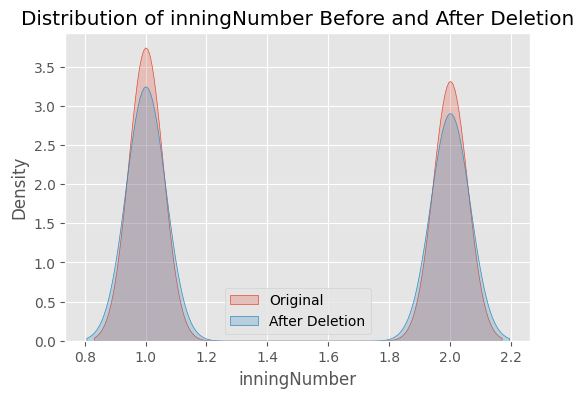

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


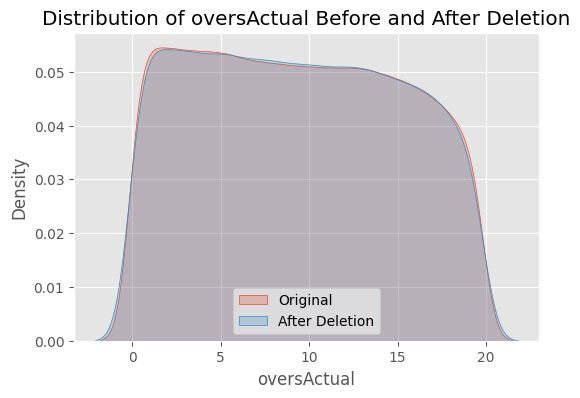

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


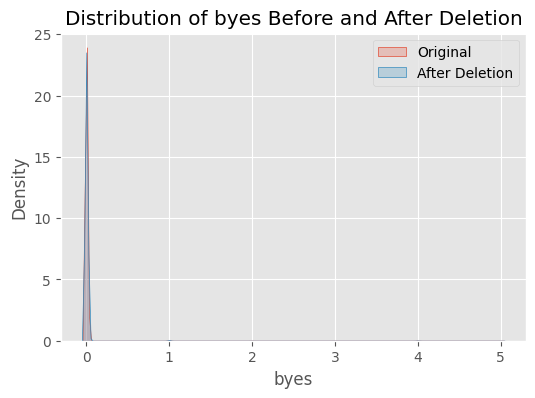

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


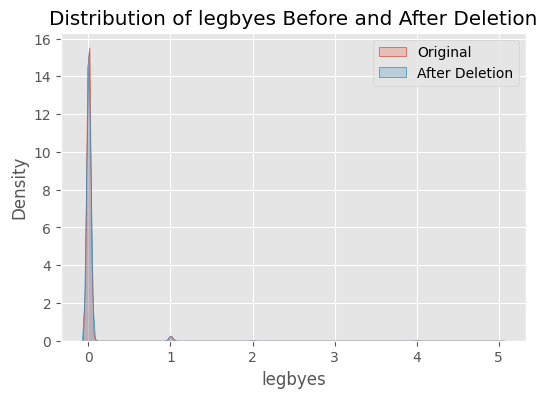

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


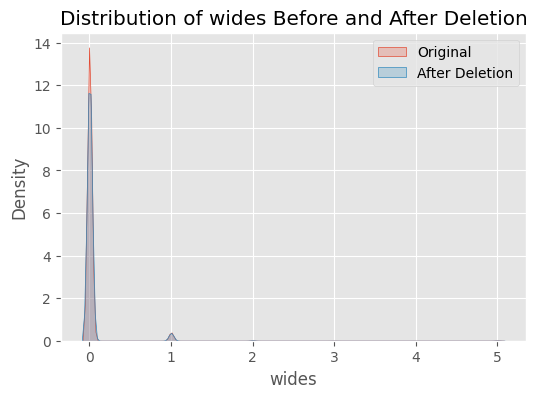

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


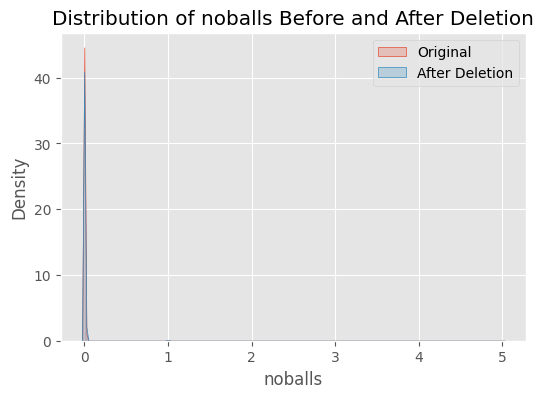

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


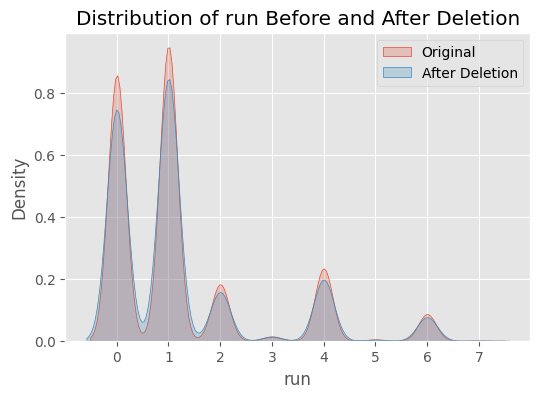

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


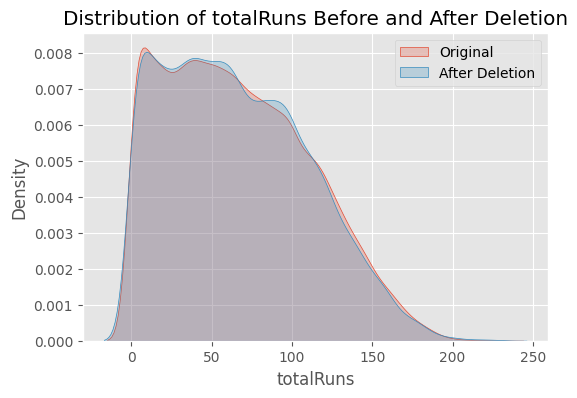

/tmp/ipykernel_12278/3506942086.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ball_df[col], label="Original", shade=True)
/tmp/ipykernel_12278/3506942086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="After Deletion", shade=True)


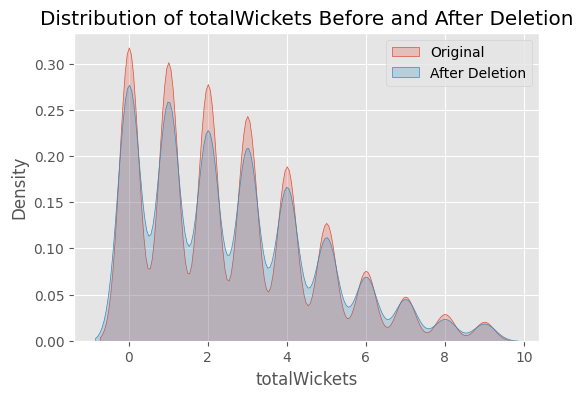

No columns show significant distribution change.


In [34]:
numeric_cols = df.select_dtypes(include=['number']).columns  
significantly_changed_cols = []

for col in numeric_cols:
    stat, p_value = ks_2samp(ball_df[col].dropna(), df[col].dropna())
    
    if p_value < 0.05:
        significantly_changed_cols.append(col)
        
    plt.figure(figsize=(6, 4))
    sns.kdeplot(ball_df[col], label="Original", shade=True)
    sns.kdeplot(df[col], label="After Deletion", shade=True)
    plt.title(f"Distribution of {col} Before and After Deletion")
    plt.legend()
    plt.show()

if significantly_changed_cols:
    print("Columns with significant distribution change (p-value < 0.05):")
    print(significantly_changed_cols)
else:
    print("No columns show significant distribution change.")

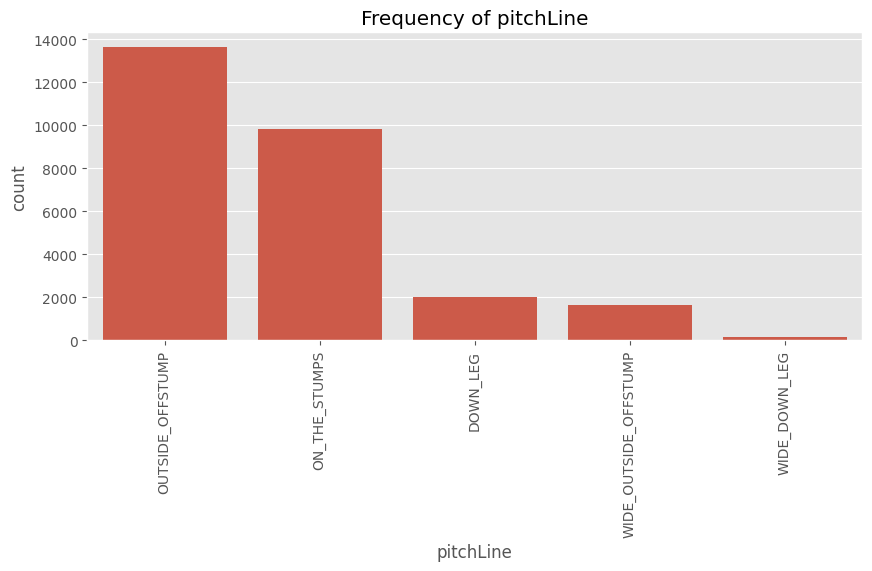

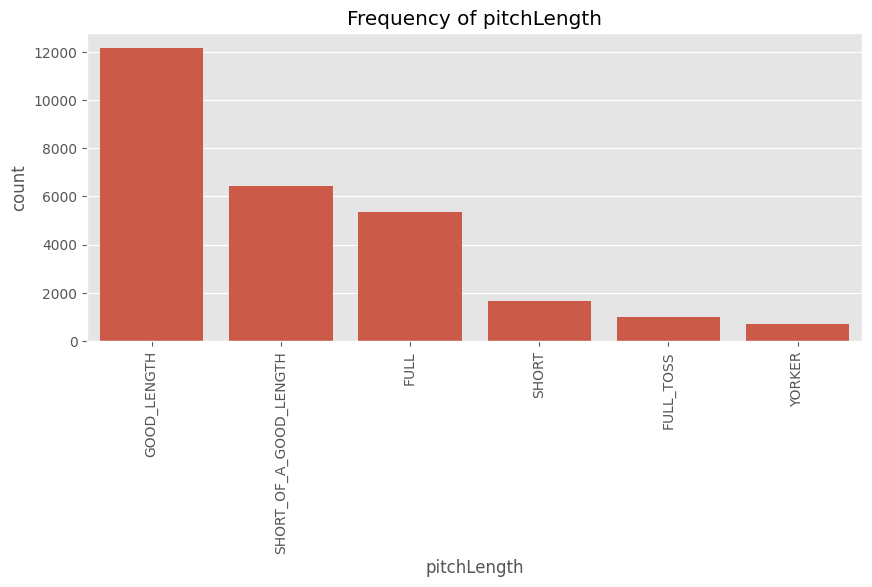

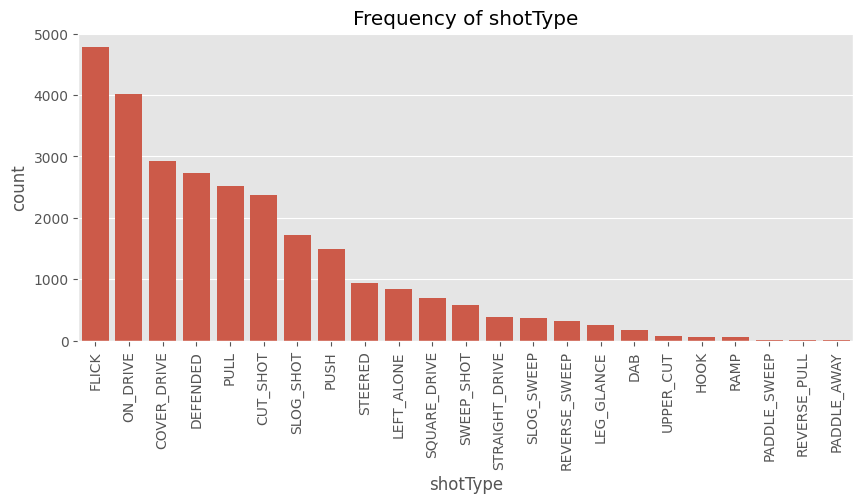

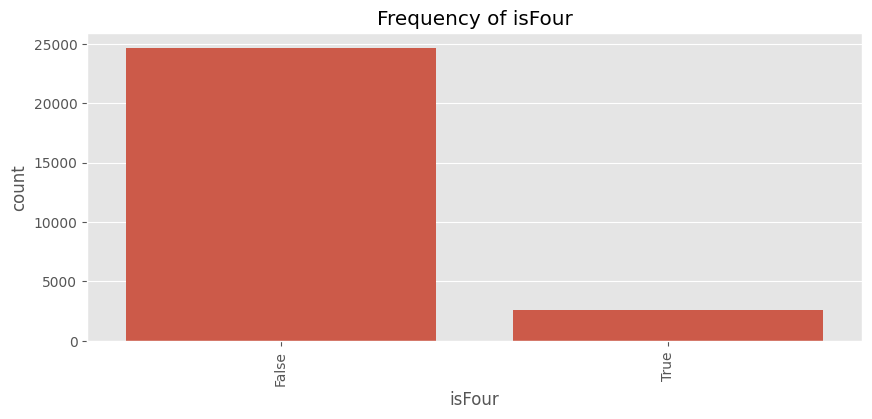

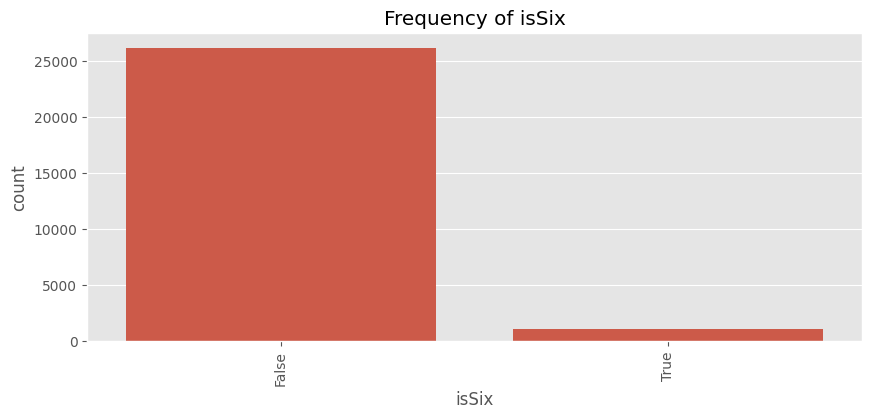

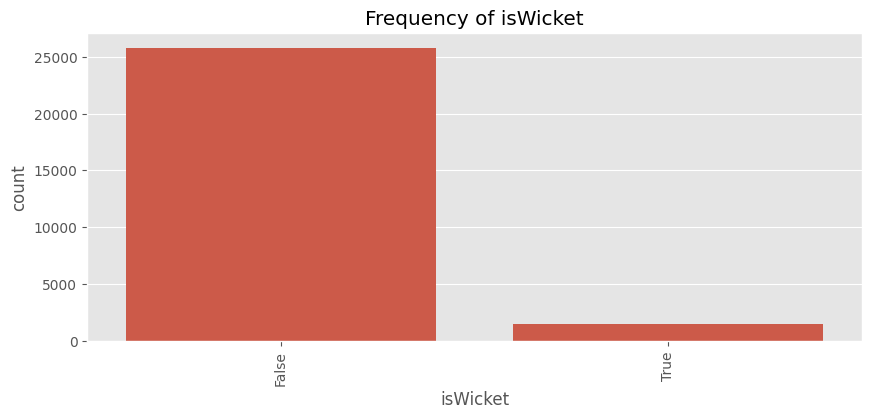

In [35]:
categorical_cols = ['pitchLine', 'pitchLength', 'shotType','isFour','isSix','isWicket']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=90)
    plt.show()

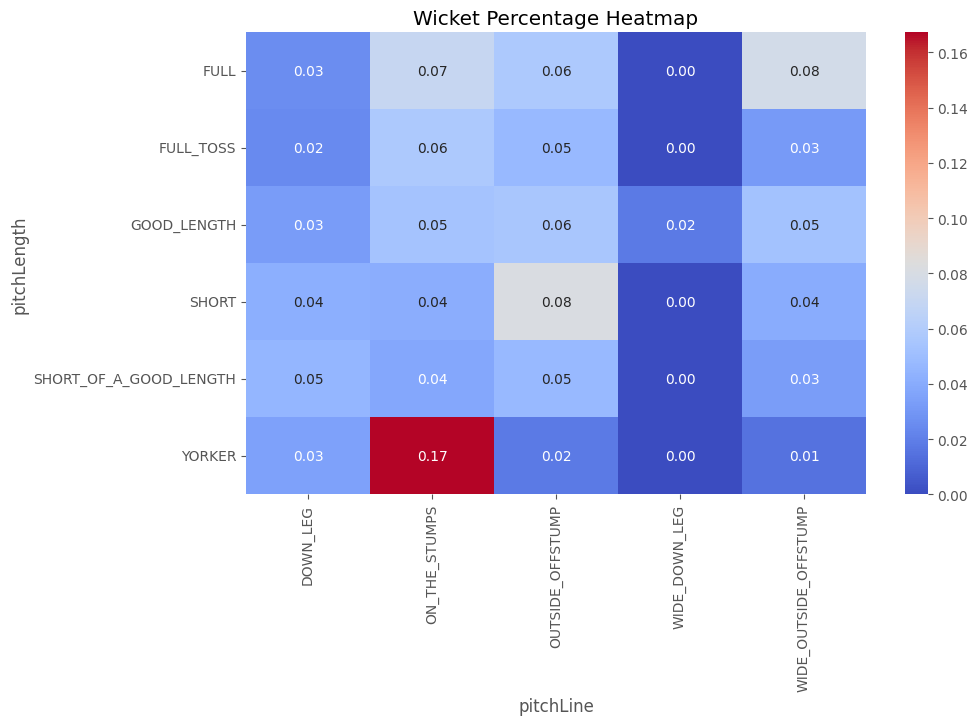

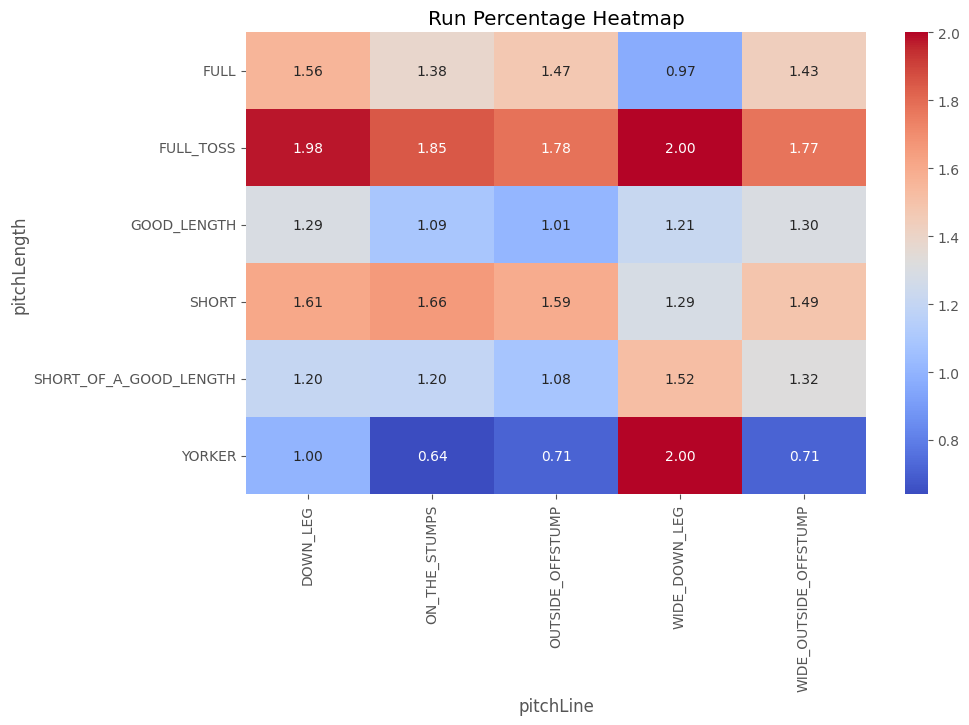

In [36]:
pivot_wicket = df.pivot_table(index='pitchLength', columns='pitchLine', values='isWicket', aggfunc='mean')
pivot_run = df.pivot_table(index='pitchLength', columns='pitchLine', values='run', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_wicket, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Wicket Percentage Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_run, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Run Percentage Heatmap')
plt.show()

<Figure size 1200x600 with 0 Axes>

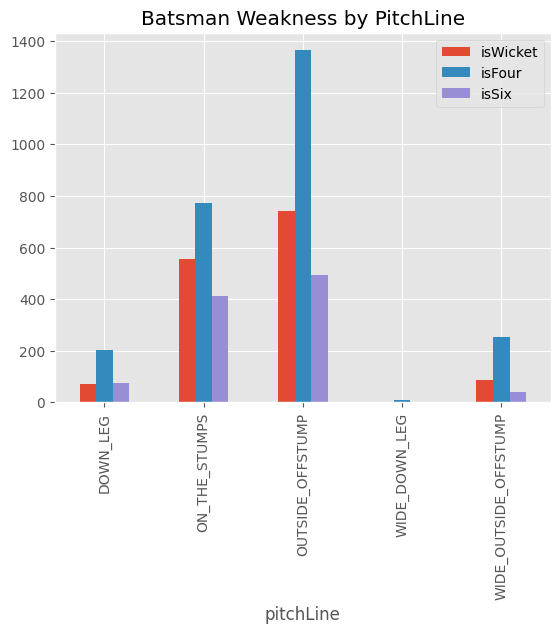

<Figure size 1200x600 with 0 Axes>

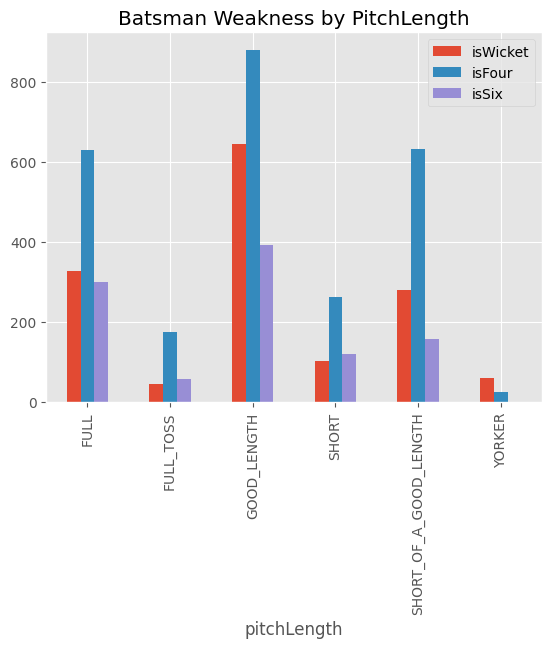

In [37]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['pitchLine'])[['isWicket', 'isFour', 'isSix']].sum().reset_index()
df_grouped.plot(x='pitchLine', kind='bar', stacked=False)
plt.title('Batsman Weakness by PitchLine')
plt.show()

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['pitchLength'])[['isWicket', 'isFour', 'isSix']].sum().reset_index()
df_grouped.plot(x='pitchLength', kind='bar', stacked=False)
plt.title('Batsman Weakness by PitchLength')
plt.show()

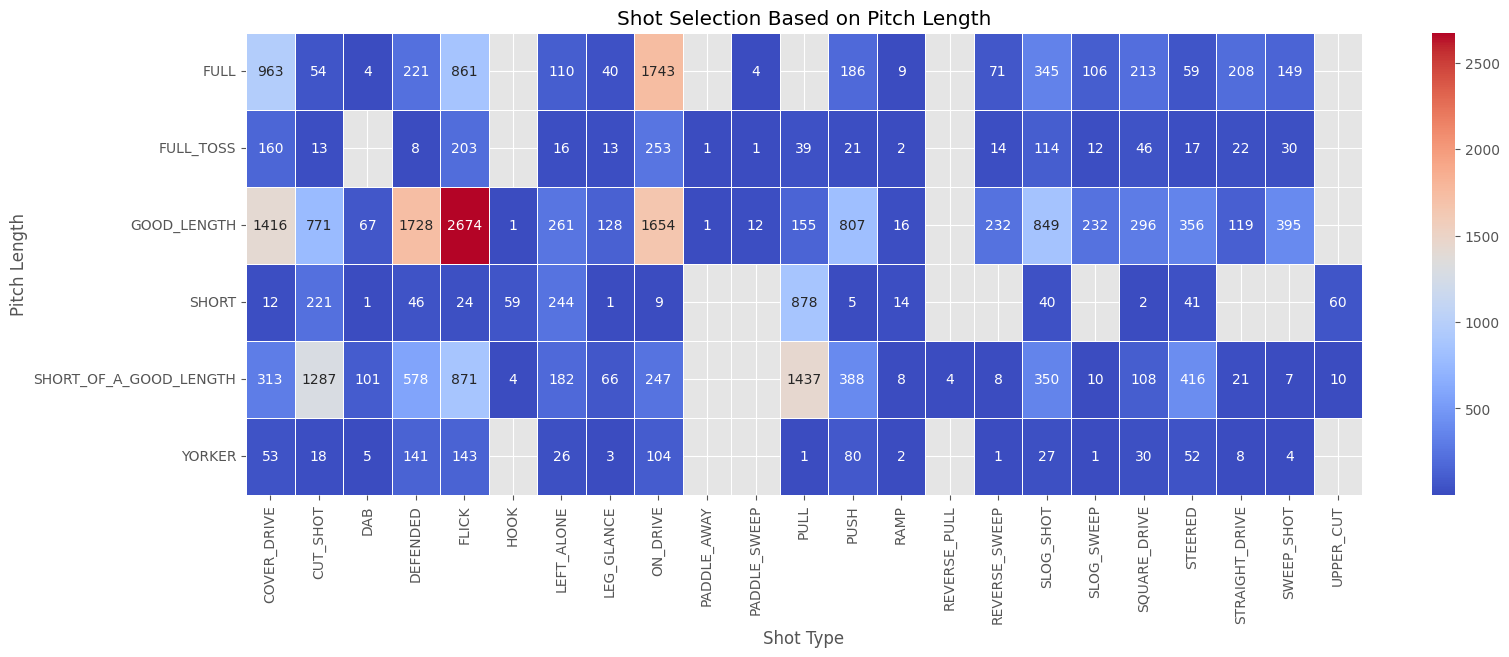

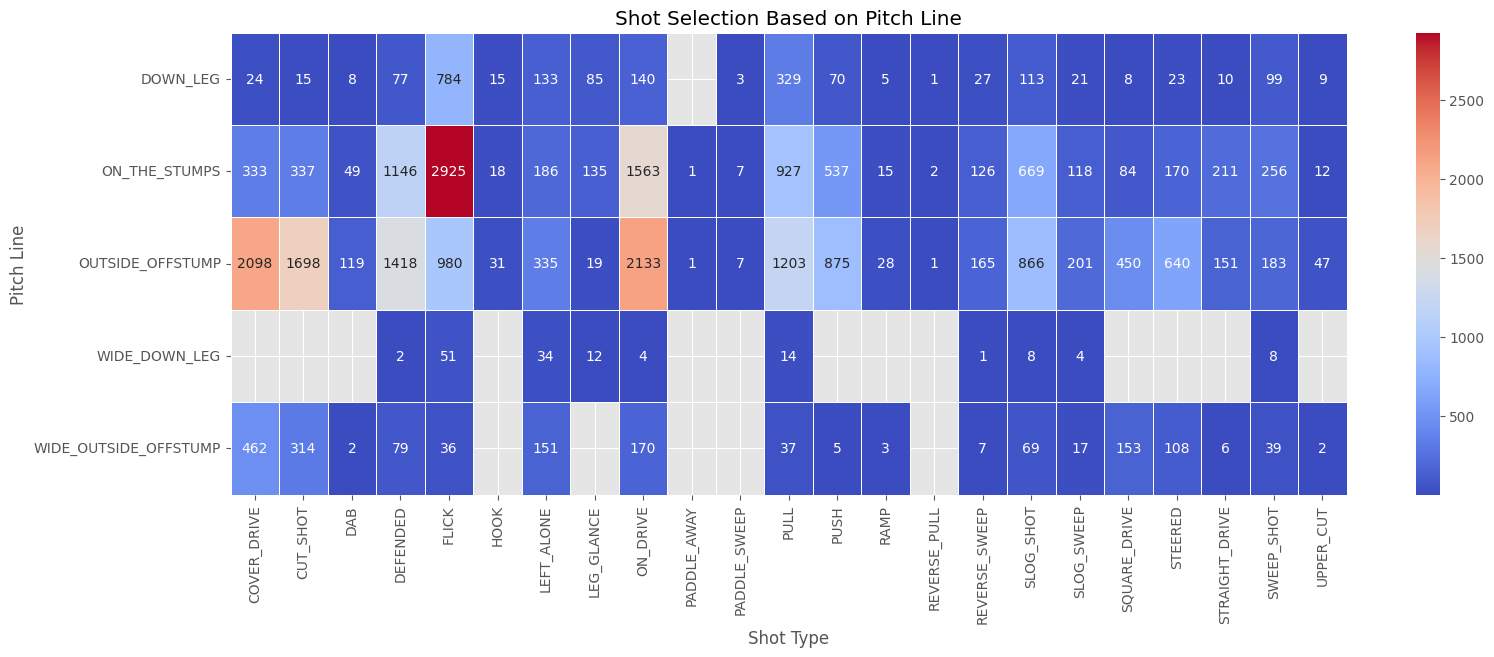

In [38]:
plt.figure(figsize=(18, 6))
pivot_shot_selection = df.pivot_table(index='pitchLength', columns='shotType', values='run', aggfunc='count')
sns.heatmap(pivot_shot_selection, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Shot Selection Based on Pitch Length')
plt.xlabel('Shot Type')
plt.ylabel('Pitch Length')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18, 6))
pivot_shot_selection = df.pivot_table(index='pitchLine', columns='shotType', values='run', aggfunc='count')
sns.heatmap(pivot_shot_selection, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Shot Selection Based on Pitch Line')
plt.xlabel('Shot Type')
plt.ylabel('Pitch Line')
plt.xticks(rotation=90)
plt.show()

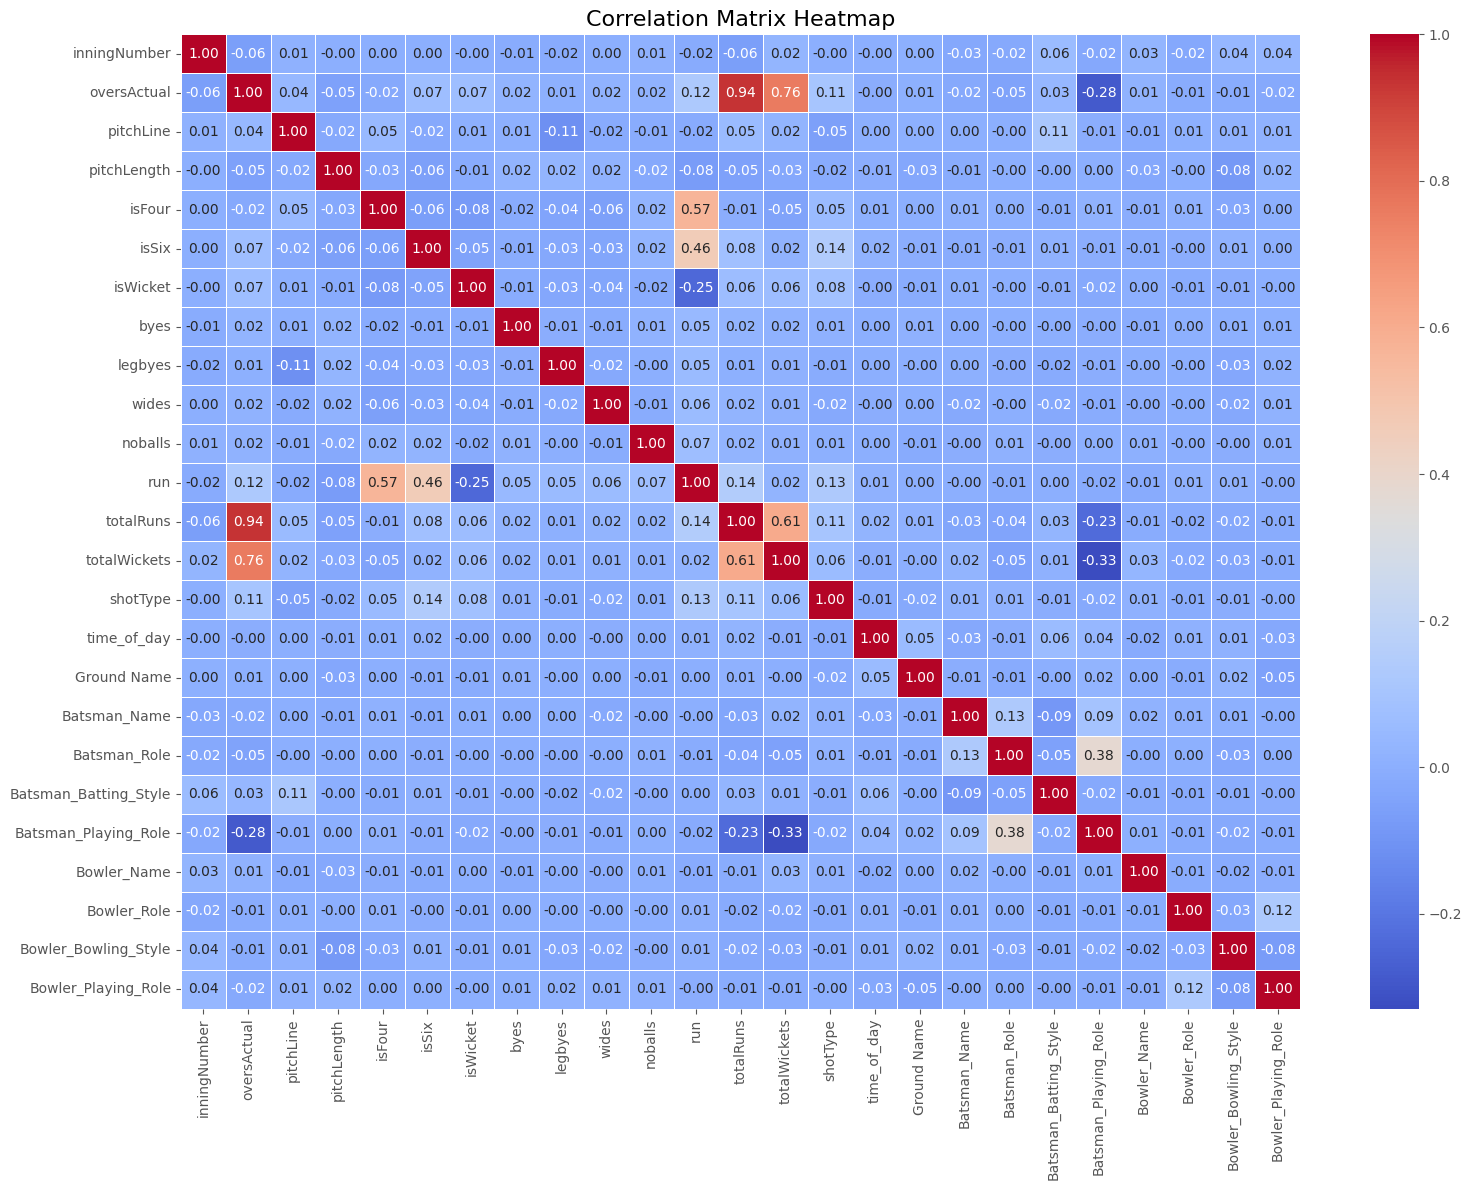

In [39]:
df_transformed = df.copy()

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs() > 1
for col in numerical_cols[skewed_cols]:
    df_transformed[col] = np.log1p(df[col])

scaler = StandardScaler()
df_transformed[numerical_cols] = scaler.fit_transform(df_transformed[numerical_cols])

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df[col])
    label_encoders[col] = le

correlation_matrix = df_transformed.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

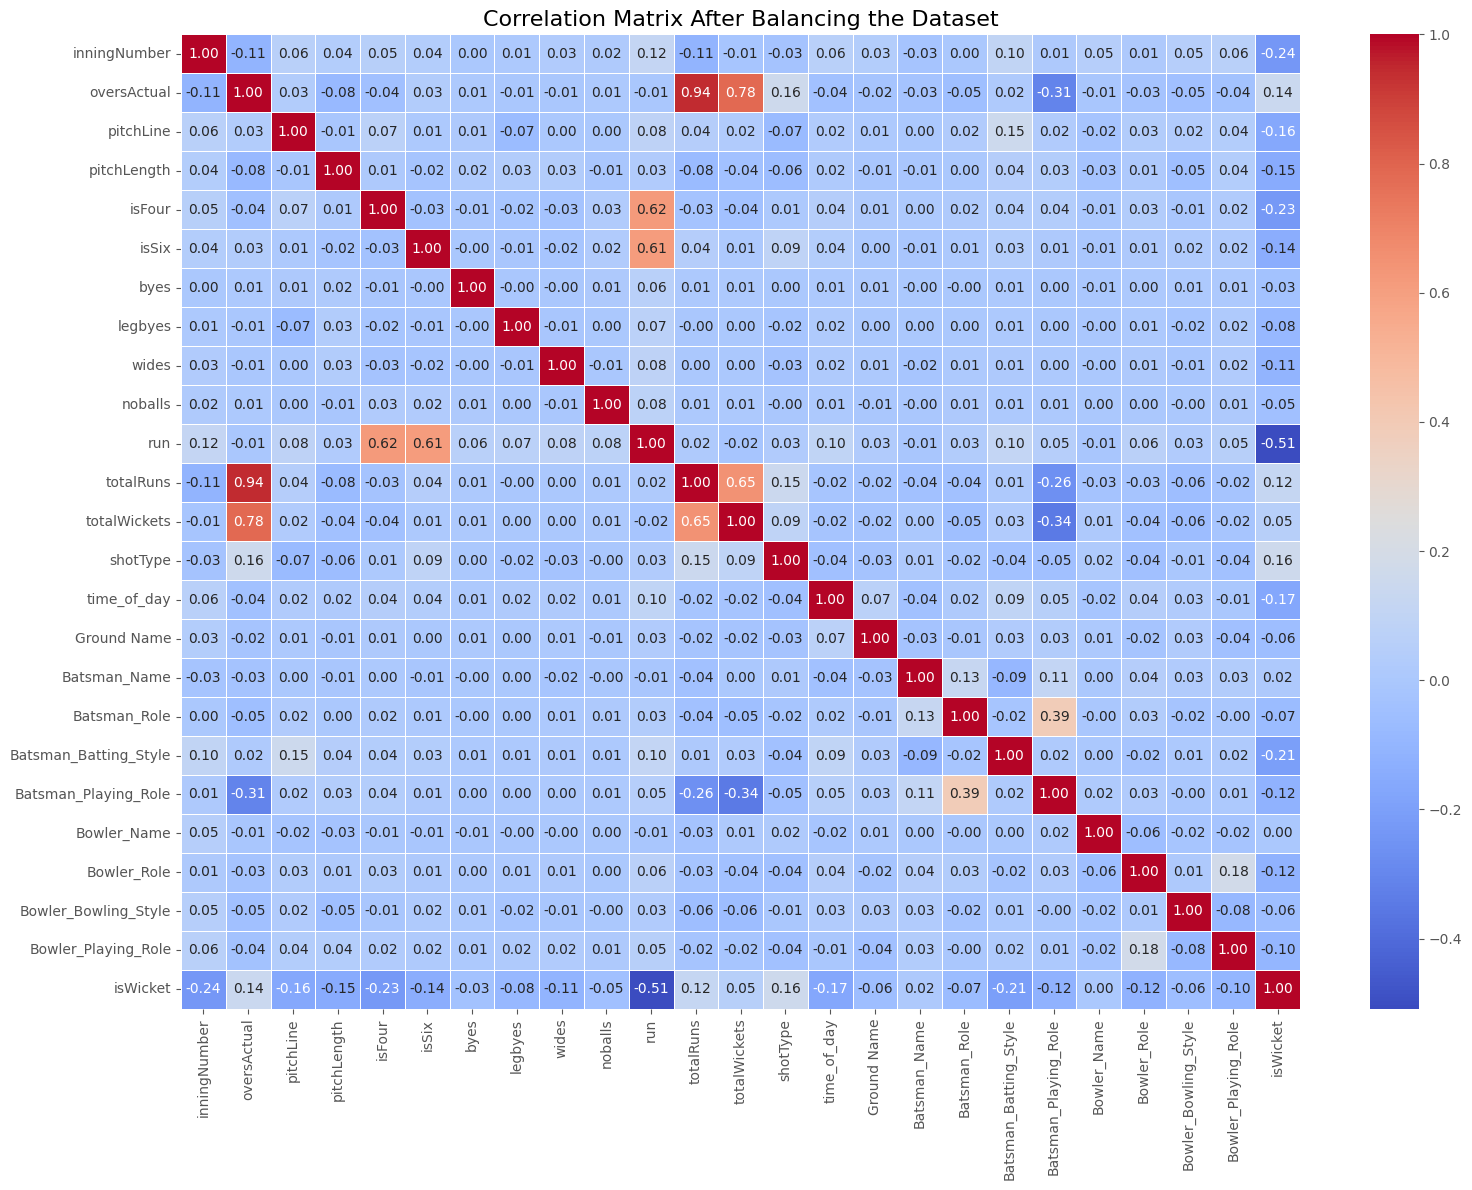

In [40]:
X = df.drop('isWicket', axis=1)
y = df['isWicket']

categorical_cols = X.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

columns_to_scale = [col for col in X.columns if col not in ['pitchLine', 'pitchLength', 'Bowler_Bowling_Style', 'shotType']]

scaler = StandardScaler()
X_resampled[columns_to_scale] = scaler.fit_transform(X_resampled[columns_to_scale])

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['isWicket'] = y_resampled

corr_after_balance = df_resampled.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_after_balance, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix After Balancing the Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [41]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [42]:
df_encoded.to_csv('Preprocessed_Data.csv')